In [195]:
import numpy as np
import sep

In [196]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = [10.0,8.0]


In [197]:
fname = "f105w"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: f105w
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


In [198]:
data = hdu_list[0].data

In [199]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(3600, 3600)


In [200]:
image_header = hdu_list[0].header

In [201]:
hdu_list.close()

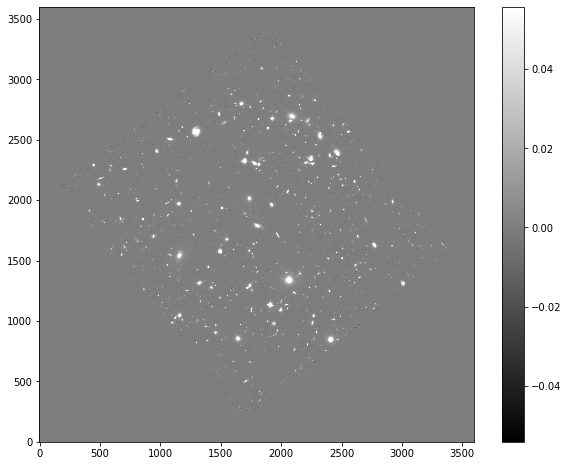

In [202]:
m = np.mean(data)
s = np.std(data)
plt.imshow(data, interpolation = 'nearest', cmap='gray',vmin=m-s,vmax=m+s,origin='lower')
plt.colorbar()

In [203]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [204]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [205]:
bkg_image = bkg.back()

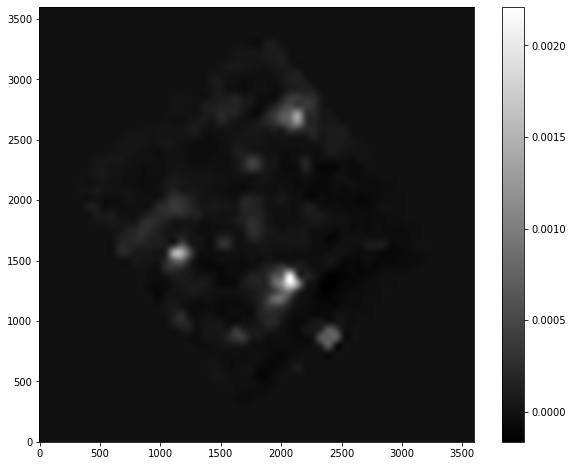

In [206]:
plt.imshow(bkg_image, interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();

In [207]:
bkg_rms = bkg.rms()

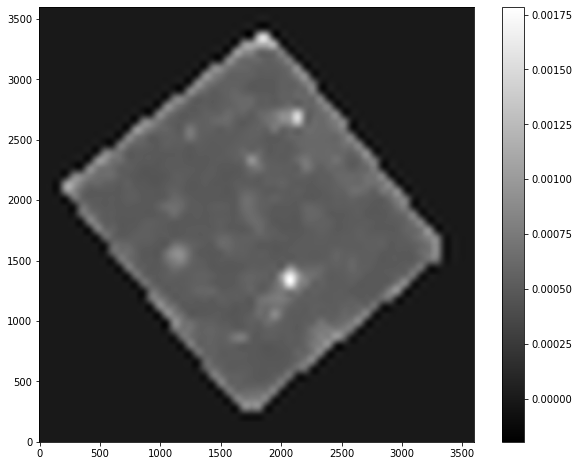

In [208]:
plt.imshow(bkg_rms, interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();

In [209]:
data_sub = data - bkg

In [210]:
objects = sep.extract(data_sub,1.5,err=bkg.globalrms)

In [211]:
len(objects)

8640

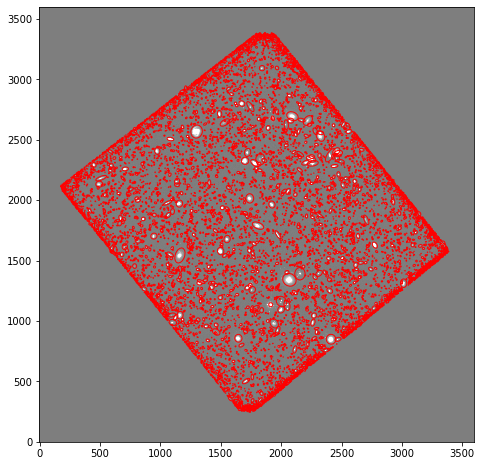

In [212]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation = 'nearest', cmap = 'gray', vmin=m-s, vmax=m+s,origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i],objects['y'][i]), width = 6*objects['a'][i],height=6*objects['b'][i],angle=objects['theta'][i]*180.0/np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [213]:
print( "Sources found " , len(objects))

Sources found  8640


In [214]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [215]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'],objects['y'],3.0, err=bkg.globalrms,gain=1.0)

In [216]:
for i in range(8640):
    print("object{:d}: flux = {:f}+/- {:f}".format(i, flux[i],fluxerr[i]))

object0: flux = 0.031282+/- 0.176890
object1: flux = 0.031018+/- 0.176142
object2: flux = -0.024388+/- 0.002883
object3: flux = 0.001947+/- 0.044219
object4: flux = 0.012457+/- 0.111649
object5: flux = -0.011228+/- 0.002875
object6: flux = 0.029368+/- 0.171394
object7: flux = -0.009126+/- 0.002875
object8: flux = 0.048023+/- 0.219161
object9: flux = 0.027840+/- 0.166877
object10: flux = 0.104682+/- 0.323559
object11: flux = 0.044953+/- 0.212041
object12: flux = 0.014043+/- 0.118538
object13: flux = 0.010265+/- 0.101357
object14: flux = 0.011400+/- 0.106811
object15: flux = 0.025562+/- 0.159908
object16: flux = 0.016498+/- 0.128478
object17: flux = -0.008420+/- 0.002875
object18: flux = 0.006981+/- 0.083599
object19: flux = 0.014791+/- 0.121653
object20: flux = -0.002137+/- 0.002863
object21: flux = 0.057425+/- 0.239652
object22: flux = -0.006278+/- 0.002863
object23: flux = 0.034407+/- 0.185514
object24: flux = 0.031591+/- 0.177761
object25: flux = 0.018111+/- 0.134608
object26: flux =

object1599: flux = 0.131053+/- 0.362024
object1600: flux = 0.068498+/- 0.261737
object1601: flux = 0.038890+/- 0.197225
object1602: flux = 0.054517+/- 0.233506
object1603: flux = 0.035496+/- 0.188425
object1604: flux = 0.024328+/- 0.155999
object1605: flux = 0.013946+/- 0.118126
object1606: flux = 0.396052+/- 0.629333
object1607: flux = 0.503278+/- 0.709426
object1608: flux = 0.018688+/- 0.136735
object1609: flux = 0.027159+/- 0.164823
object1610: flux = 0.037463+/- 0.193576
object1611: flux = 0.160606+/- 0.400768
object1612: flux = 0.725690+/- 0.851879
object1613: flux = 0.020317+/- 0.142565
object1614: flux = 0.021030+/- 0.145047
object1615: flux = 0.287319+/- 0.536029
object1616: flux = 0.029014+/- 0.170359
object1617: flux = 0.095472+/- 0.308999
object1618: flux = 0.025265+/- 0.158977
object1619: flux = 0.006288+/- 0.079351
object1620: flux = 0.024504+/- 0.156563
object1621: flux = 0.010563+/- 0.102818
object1622: flux = 0.038178+/- 0.195413
object1623: flux = 0.045460+/- 0.213233


object1977: flux = 0.003451+/- 0.058812
object1978: flux = 0.053267+/- 0.230815
object1979: flux = 0.053463+/- 0.231238
object1980: flux = 0.022257+/- 0.149216
object1981: flux = 0.024968+/- 0.158040
object1982: flux = 0.029434+/- 0.171586
object1983: flux = 0.041601+/- 0.203983
object1984: flux = 0.003072+/- 0.055496
object1985: flux = 0.045583+/- 0.213521
object1986: flux = 0.055664+/- 0.235949
object1987: flux = 0.032364+/- 0.179924
object1988: flux = 0.178425+/- 0.422414
object1989: flux = 0.116190+/- 0.340878
object1990: flux = 1.980768+/- 1.407400
object1991: flux = 0.432935+/- 0.657984
object1992: flux = 0.604576+/- 0.777550
object1993: flux = 0.023260+/- 0.152538
object1994: flux = 0.032332+/- 0.179834
object1995: flux = 0.077821+/- 0.278978
object1996: flux = 0.327584+/- 0.572357
object1997: flux = 0.091871+/- 0.303117
object1998: flux = 0.058960+/- 0.242834
object1999: flux = 0.031656+/- 0.177945
object2000: flux = 0.032539+/- 0.180407
object2001: flux = 0.017338+/- 0.131707


object3098: flux = 0.152325+/- 0.390299
object3099: flux = 0.049023+/- 0.221430
object3100: flux = 0.047254+/- 0.217399
object3101: flux = 0.101445+/- 0.318516
object3102: flux = 0.012731+/- 0.112868
object3103: flux = 0.019874+/- 0.141006
object3104: flux = 0.012102+/- 0.110046
object3105: flux = 0.003362+/- 0.058053
object3106: flux = 0.038942+/- 0.197359
object3107: flux = 0.032940+/- 0.181517
object3108: flux = 0.020987+/- 0.144897
object3109: flux = 0.005478+/- 0.074070
object3110: flux = 0.013997+/- 0.118344
object3111: flux = 0.103362+/- 0.321513
object3112: flux = 0.085023+/- 0.291602
object3113: flux = 0.113901+/- 0.337505
object3114: flux = 0.073051+/- 0.270295
object3115: flux = 0.028043+/- 0.167486
object3116: flux = 0.051708+/- 0.227412
object3117: flux = 0.054576+/- 0.233633
object3118: flux = 0.164921+/- 0.406114
object3119: flux = 2.857133+/- 1.690308
object3120: flux = 0.142630+/- 0.377675
object3121: flux = 0.107647+/- 0.328109
object3122: flux = 0.026350+/- 0.162353


object4598: flux = 0.032521+/- 0.180359
object4599: flux = 0.005209+/- 0.072231
object4600: flux = 0.043855+/- 0.209435
object4601: flux = 0.026328+/- 0.162285
object4602: flux = 0.046700+/- 0.216121
object4603: flux = 0.154007+/- 0.392448
object4604: flux = 0.114096+/- 0.337793
object4605: flux = 0.080539+/- 0.283808
object4606: flux = 0.023436+/- 0.153114
object4607: flux = 0.022668+/- 0.150585
object4608: flux = 0.019883+/- 0.141037
object4609: flux = 0.549313+/- 0.741162
object4610: flux = 4.902050+/- 2.214059
object4611: flux = 0.021272+/- 0.145878
object4612: flux = 0.020647+/- 0.143721
object4613: flux = 0.041630+/- 0.204053
object4614: flux = 0.012802+/- 0.113181
object4615: flux = 0.019771+/- 0.140639
object4616: flux = 0.015588+/- 0.124886
object4617: flux = 0.010884+/- 0.104367
object4618: flux = 0.023533+/- 0.153431
object4619: flux = 0.041461+/- 0.203640
object4620: flux = 0.031992+/- 0.178885
object4621: flux = 0.057404+/- 0.239608
object4622: flux = 0.070738+/- 0.265981


object6188: flux = 0.023145+/- 0.152161
object6189: flux = 0.140737+/- 0.375161
object6190: flux = 0.028438+/- 0.168659
object6191: flux = 0.171096+/- 0.413647
object6192: flux = 0.023699+/- 0.153973
object6193: flux = 0.025690+/- 0.160306
object6194: flux = 0.040140+/- 0.200371
object6195: flux = 0.019472+/- 0.139573
object6196: flux = 0.081206+/- 0.284981
object6197: flux = 0.022309+/- 0.149388
object6198: flux = 0.058017+/- 0.240884
object6199: flux = 0.190217+/- 0.436149
object6200: flux = 0.247429+/- 0.497430
object6201: flux = 0.196529+/- 0.443325
object6202: flux = 0.036509+/- 0.191096
object6203: flux = -0.006360+/- 0.002875
object6204: flux = 0.157759+/- 0.397200
object6205: flux = 0.162871+/- 0.403584
object6206: flux = 0.098250+/- 0.313462
object6207: flux = 0.068174+/- 0.261117
object6208: flux = 0.092580+/- 0.304283
object6209: flux = -0.002815+/- 0.002869
object6210: flux = 0.029533+/- 0.171877
object6211: flux = 0.042325+/- 0.205750
object6212: flux = 0.069070+/- 0.26282

object7597: flux = 0.025747+/- 0.160484
object7598: flux = 0.025564+/- 0.159914
object7599: flux = 0.041718+/- 0.204271
object7600: flux = 0.024210+/- 0.155623
object7601: flux = 0.333790+/- 0.577752
object7602: flux = 0.264723+/- 0.514520
object7603: flux = 0.136263+/- 0.369150
object7604: flux = -0.005512+/- 0.002867
object7605: flux = 0.062911+/- 0.250837
object7606: flux = 0.009334+/- 0.096654
object7607: flux = 0.012717+/- 0.112805
object7608: flux = 0.000154+/- 0.012722
object7609: flux = 0.043180+/- 0.207817
object7610: flux = 0.053103+/- 0.230460
object7611: flux = 0.010725+/- 0.103602
object7612: flux = 0.020493+/- 0.143184
object7613: flux = 0.004730+/- 0.068837
object7614: flux = 0.353467+/- 0.594538
object7615: flux = 0.045676+/- 0.213739
object7616: flux = 0.017397+/- 0.131927
object7617: flux = 0.028046+/- 0.167494
object7618: flux = 0.099823+/- 0.315960
object7619: flux = 0.021843+/- 0.147820
object7620: flux = 0.018627+/- 0.136511
object7621: flux = 0.011239+/- 0.106055

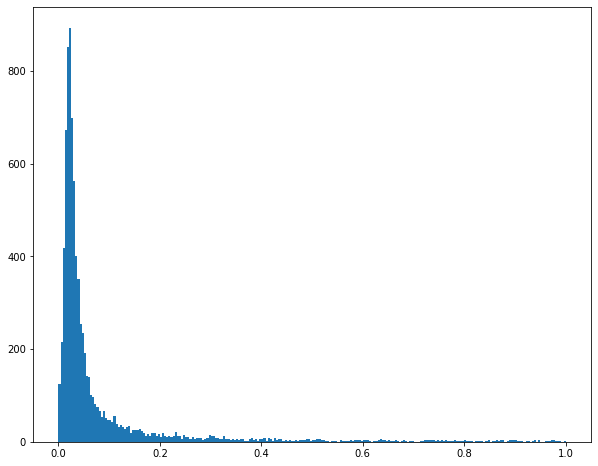

<Figure size 3.6x3.6 with 0 Axes>

In [217]:
x = flux
plt.hist(x,range=[0,1],bins='auto')
plt.figure(figsize=(0.05,0.05))
plt.show()